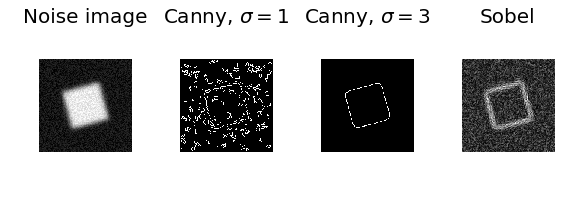

In [5]:
import numpy as np
#from skimage import data
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage as ndi
from skimage import feature

# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# Sobel edge detection
dx = ndi.sobel(im, 0)  # horizontal derivative
dy = ndi.sobel(im, 1)  # vertical derivative
mag = np.hypot(dx, dy)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize (Q&D)

# display results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Noise image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny, $\sigma=3$', fontsize=20)

ax4.imshow(mag, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Sobel', fontsize=20)

fig.tight_layout()

plt.show()